In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
df = pd.read_csv('Ridge Lassso Elastic Regression Practicals/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [35]:
df.loc[:122,"Region"] = 0
df.loc[122:,"Region"] = 1

In [38]:
df[['Region']] = df[['Region']].astype('int')

In [39]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [40]:
df = df.dropna().reset_index(drop = True)

In [43]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [44]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [45]:
df = df.drop(122).reset_index(drop = True)

In [46]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [48]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Changing the required featuers as int data type

In [49]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [50]:
df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


## Exploratory data analysis

In [58]:
df_1 = df.drop(['day','month','year'],axis = 1)

In [59]:
df_1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [55]:
# df_1['Classes'] = np.where(df['Classes'] == 'not fire',0 , 1)

In [57]:
df_1['Classes'].value_counts()

Classes
1    241
0      2
Name: count, dtype: int64

In [60]:
df_1['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

In [61]:
df_1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

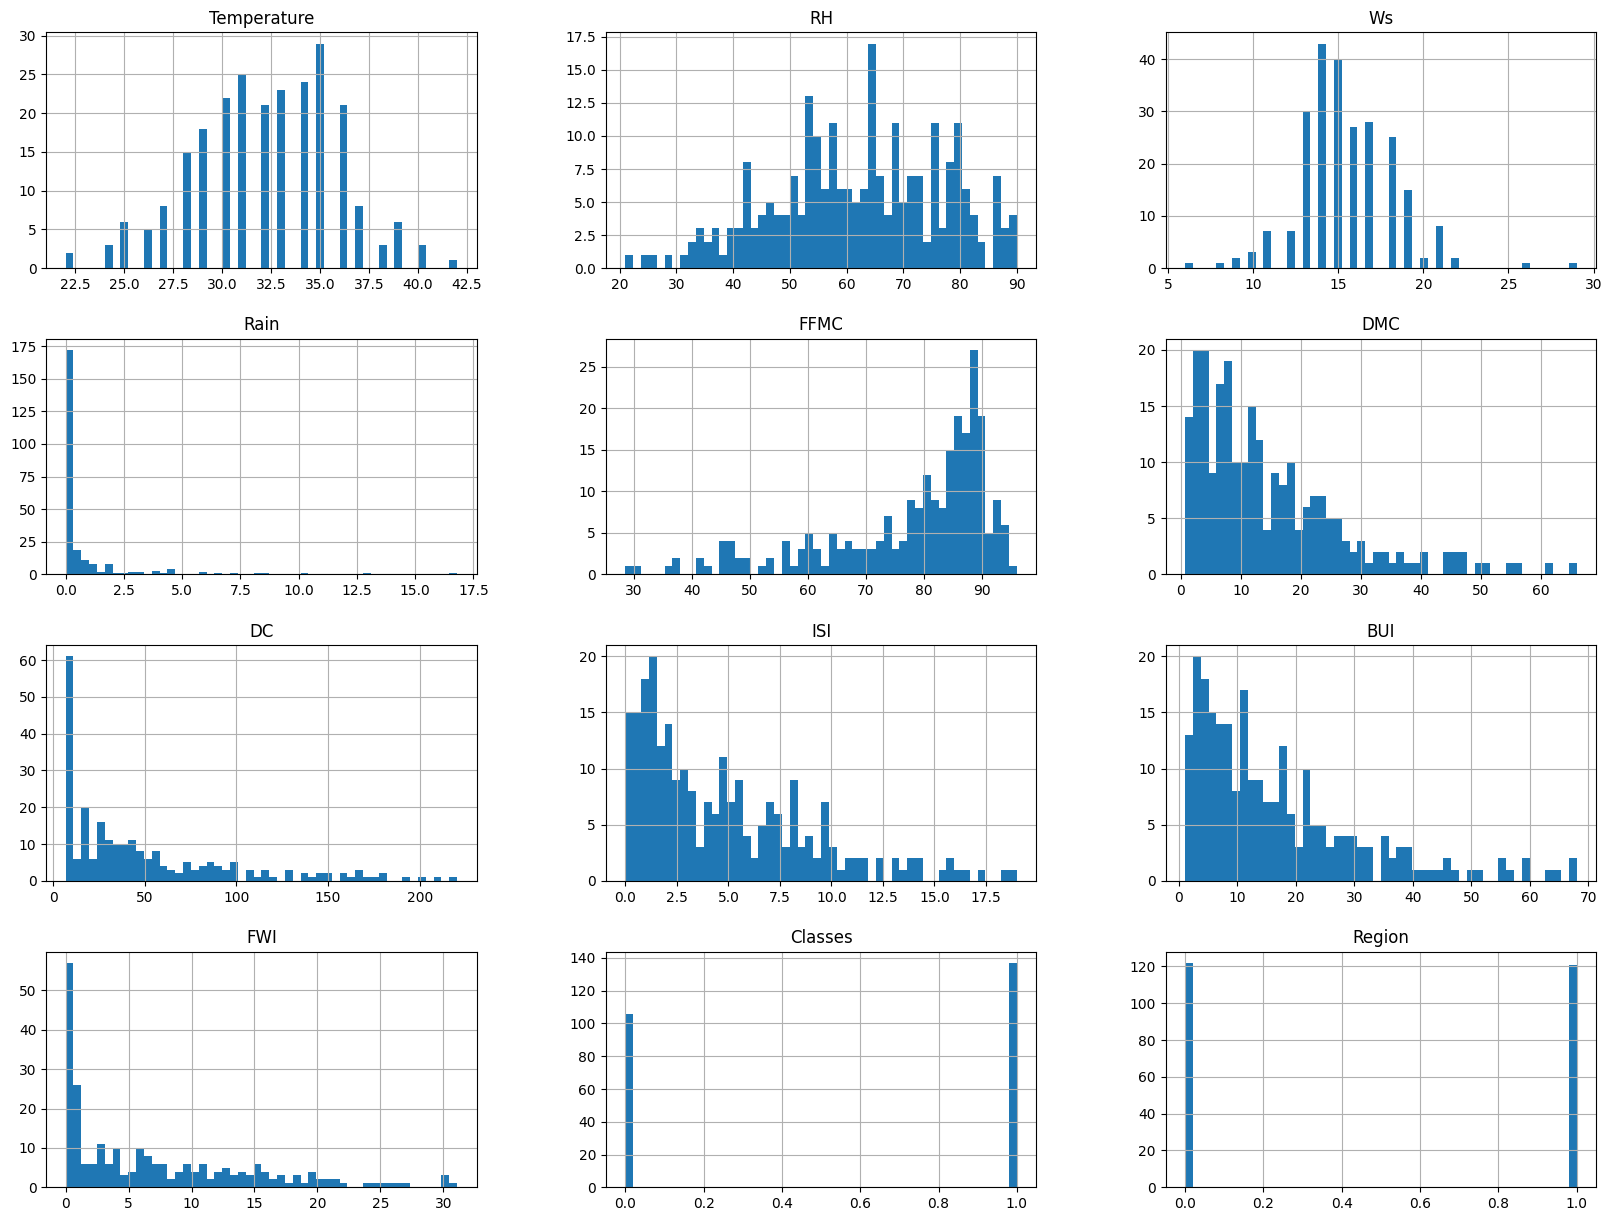

In [63]:
# density plot
plt.style.use('default')
df_1.hist(bins = 50 , figsize=(20 , 15))
plt.show()

In [65]:
percentages = df_1['Classes'].value_counts(normalize=True)*100
percentages

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

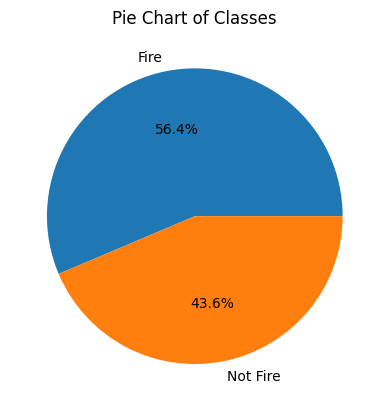

In [73]:
classlabels = ['Fire','Not Fire']
plt.pie(percentages , labels=  classlabels , autopct = '%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

<Axes: >

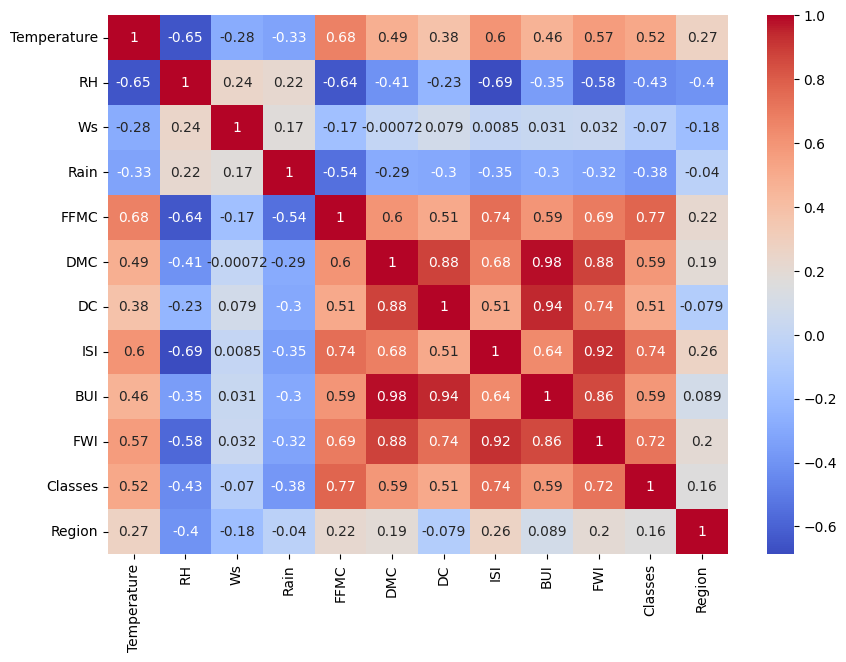

In [82]:
plt.figure(figsize=(10,7))
sns.heatmap(df_1.corr() , annot= True , cmap='coolwarm')

<Axes: xlabel='FWI'>

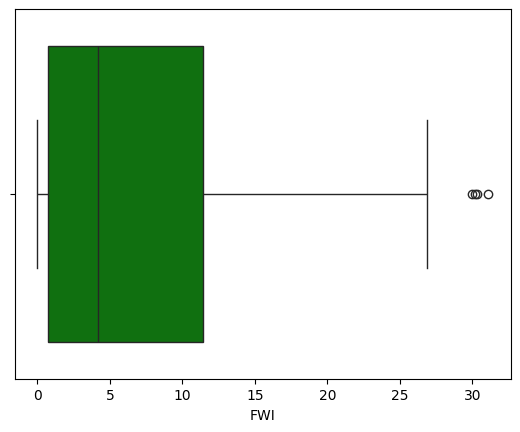

In [97]:
sns.boxplot(df['FWI'] , color = 'green' , orient = 'y' , )

In [98]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

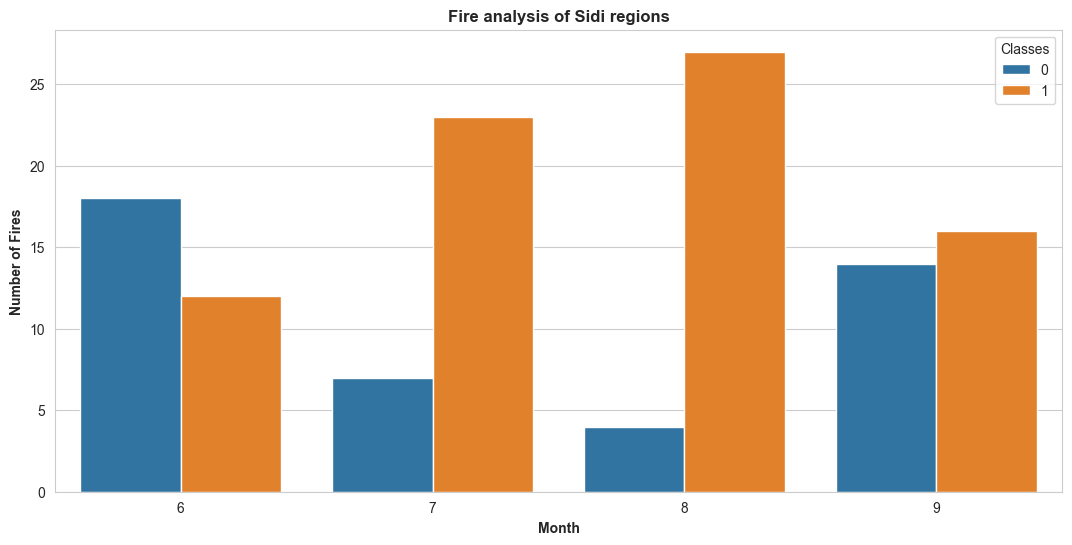

In [108]:
df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13 , 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue='Classes',data = df_temp)
plt.ylabel('Number of Fires' , weight = 'bold')
plt.xlabel('Month',weight = 'bold')
plt.title('Fire analysis of Sidi regions' , weight = 'bold');

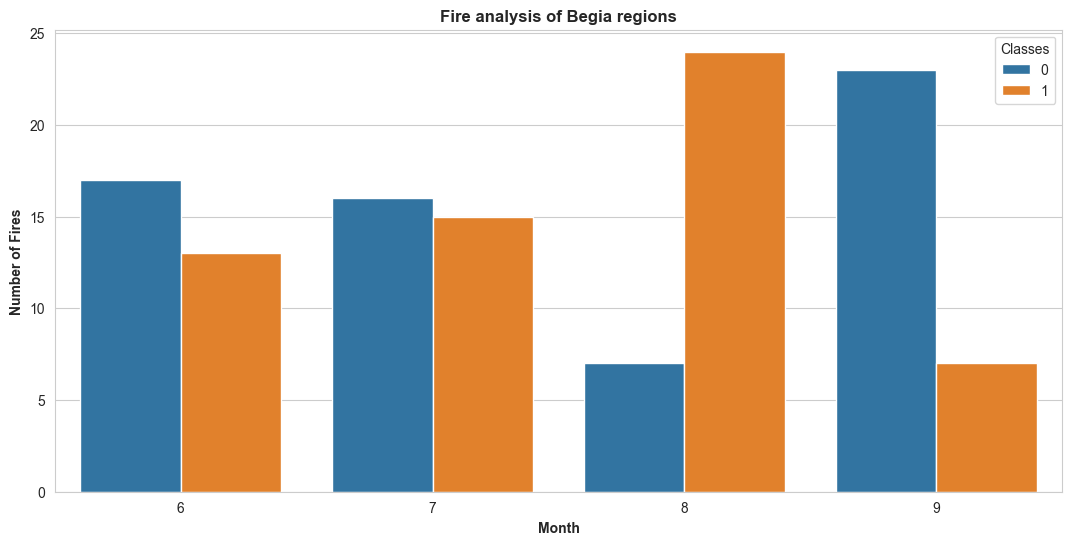

In [107]:
df_temp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13 , 6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue='Classes',data = df_temp)
plt.ylabel('Number of Fires' , weight = 'bold')
plt.xlabel('Month',weight = 'bold')
plt.title('Fire analysis of Begia regions' , weight = 'bold');

### Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Ridge Lassso Elastic Regression Practicals/Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.drop(['month','day','year'] , axis = 1 , inplace = True)

In [5]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1)

In [8]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
X = df.drop('FWI' , axis = 1)
y = df['FWI']

In [11]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
# train test split


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size= 0.25 , random_state= 42)

In [16]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [17]:
## feature selection on correation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [18]:
## check for multi-collinearity

<Axes: >

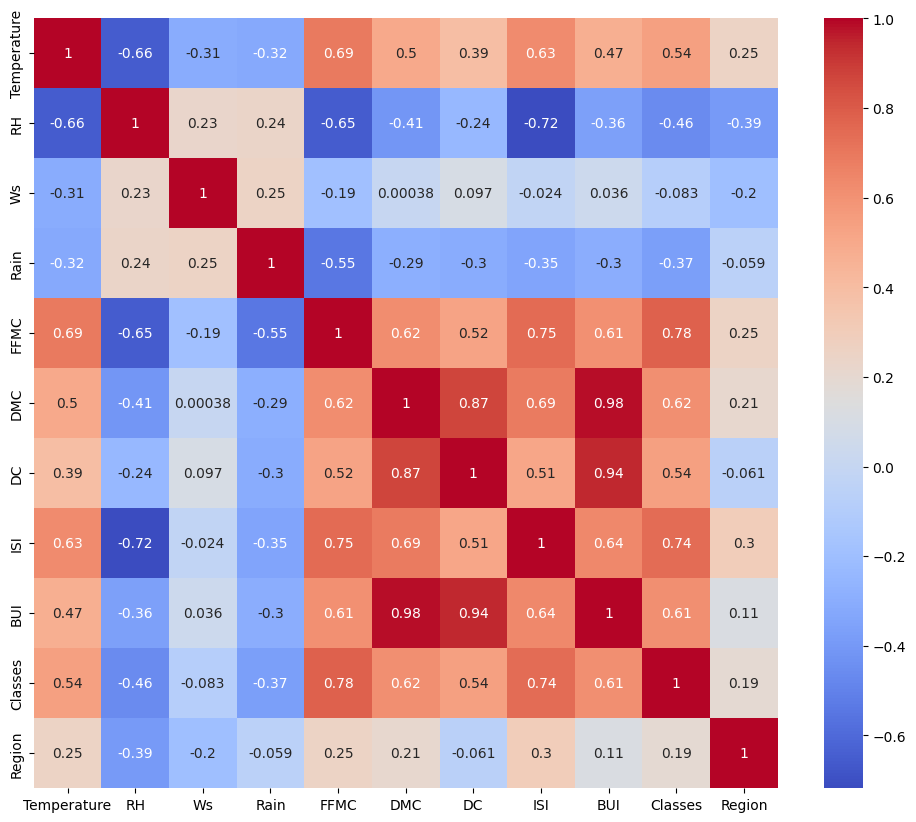

In [19]:
plt.figure(figsize=(12,10))

corr = x_train.corr()
sns.heatmap(corr ,annot = True, cmap = 'coolwarm')

In [20]:
def correlation(dataset , threshold):
    col_names = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold :
                col_name = corr_matrix.columns[i]
                col_names.add(col_name)
    return col_names

In [21]:
corr_features = correlation(x_train , 0.85) 

#checking for multi colinearity and removing the fetures
# the threshold value is generally given by  domain expertise

In [22]:
x_train.drop(corr_features , axis = 1 , inplace = True)
x_test.drop(corr_features , inplace = True  , axis = 1)

In [23]:
x_train.shape , x_test.shape

((182, 9), (61, 9))

In [24]:
## Feature scaling or Standard scalar

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [27]:
## Box plots to understand the effect of standard scaler

Text(0.5, 1.0, 'X_train after Scaling')

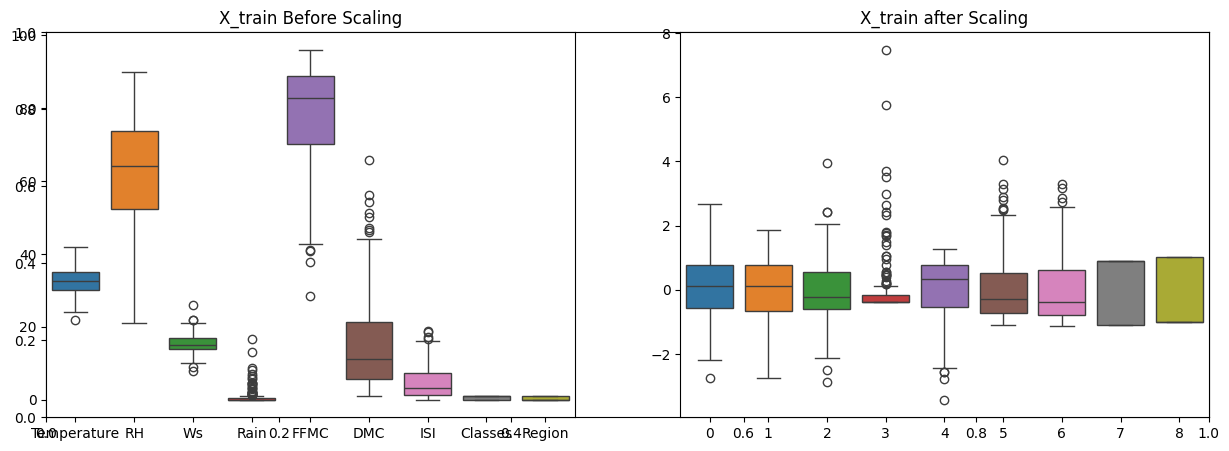

In [28]:
plt.subplots(figsize = (15 , 5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("X_train Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scale)
plt.title("X_train after Scaling")

## Linear Regression Model

Mean abosolute error : 0.5468236465249978
R2: 0.9847657384266951


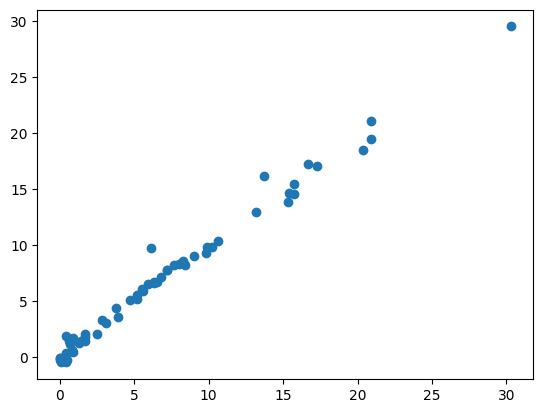

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , r2_score
linreg = LinearRegression()
linreg.fit(x_train_scale , y_train)
y_pred = linreg.predict(x_test_scale)
mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test , y_pred)

print(f"Mean abosolute error : {mae}")
print(f"R2: {r2}")

plt.scatter(y_test , y_pred);


## Lasso regression Model

Mean abosolute error : 1.133175994914409
R2: 0.9492020263112388


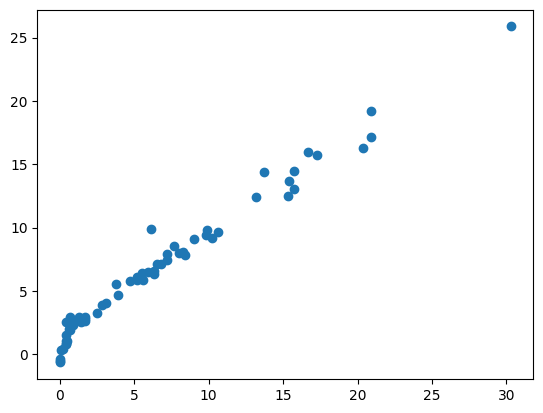

In [30]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error , r2_score
lasso = Lasso()
lasso.fit(x_train_scale , y_train)
y_pred = lasso.predict(x_test_scale)
mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test , y_pred)

print(f"Mean abosolute error : {mae}")
print(f"R2: {r2}")

plt.scatter(y_test , y_pred);


## Ridge regression model

Mean abosolute error : 0.5642305340105715
R2: 0.9842993364555512


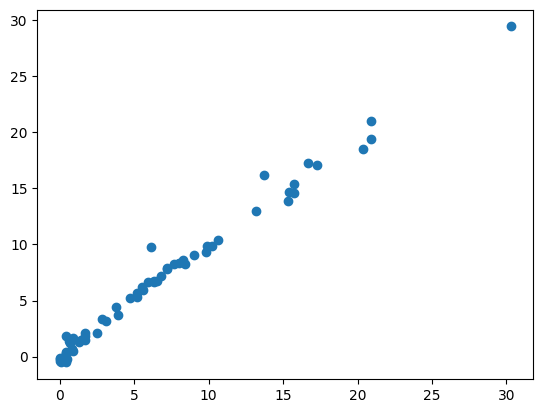

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error , r2_score
ridge = Ridge()
ridge.fit(x_train_scale , y_train)
y_pred = ridge.predict(x_test_scale)
mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test , y_pred)

print(f"Mean abosolute error : {mae}")
print(f"R2: {r2}")

plt.scatter(y_test , y_pred);


## Elastic net regression model

Mean abosolute error : 1.8822353634896005
R2: 0.8753460589519703


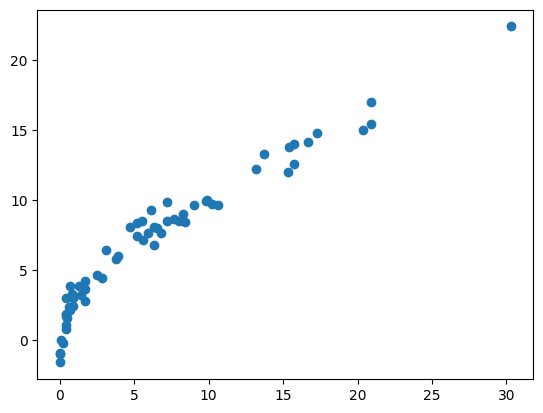

In [32]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error , r2_score
el = ElasticNet()
el.fit(x_train_scale , y_train)
y_pred = el.predict(x_test_scale)
mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_test , y_pred)

print(f"Mean abosolute error : {mae}")
print(f"R2: {r2}")

plt.scatter(y_test , y_pred);


# Hyperparameter Tuning

Mean absolute error : 0.619970115826343
R2 score : 0.980851982434192


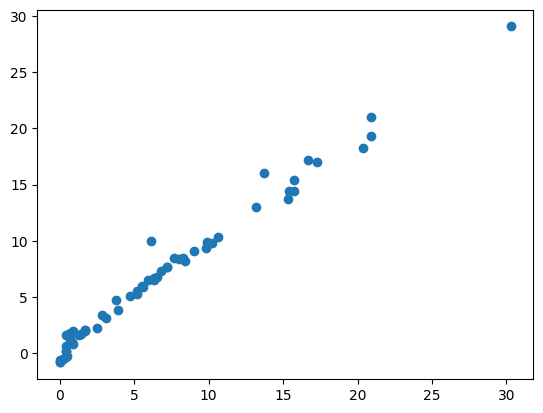

In [35]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV()

lassocv.fit(x_train_scale , y_train)
y_pred = lassocv.predict(x_test_scale)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_pred , y_test)

print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2}")

plt.scatter(y_test , y_pred);

In [38]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [39]:
lassocv.alpha_

0.05725391318234408

Mean absolute error : 0.5642305340106358
R2 score : 0.9834070933284236


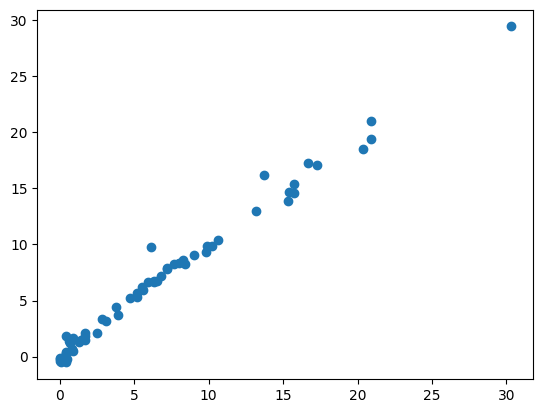

In [41]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV()

ridgecv.fit(x_train_scale , y_train)
y_pred = ridgecv.predict(x_test_scale)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_pred , y_test)

print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2}")

plt.scatter(y_test , y_pred);

In [43]:
ridgecv.alpha_

1.0

Mean absolute error : 0.6575946731430898
R2 score : 0.9799084998743879


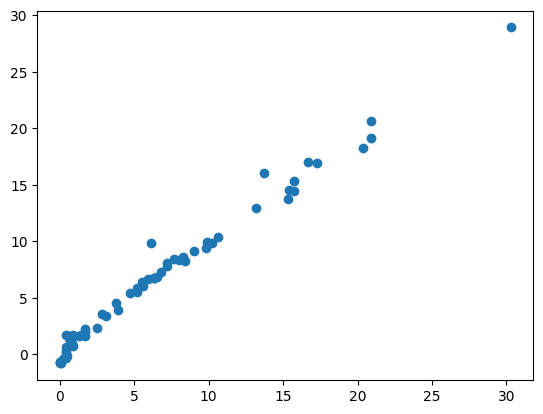

In [44]:
from sklearn.linear_model import ElasticNetCV

elcv = ElasticNetCV()

elcv.fit(x_train_scale , y_train)
y_pred = elcv.predict(x_test_scale)

mae = mean_absolute_error(y_pred , y_test)
r2 = r2_score(y_pred , y_test)

print(f"Mean absolute error : {mae}")
print(f"R2 score : {r2}")

plt.scatter(y_test , y_pred);

In [45]:
elcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [46]:
regressor = elcv

In [52]:
import pickle

with open('regressor.pkl' , 'wb') as file:
    pickle.dump(regressor , file)

In [53]:
with open('scaler.pkl' , 'wb') as file:
    pickle.dump(scaler , file)